In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt

# 6.1 Matrices

In [2]:
A = np.matrix([[0.0, 1.0, -2.3, 0.1], [1.3, 4.0, -0.1, 0.0],[4.1,-1.0, 0.0, 1.7]])
A #in Julia you ommit the multiple array brackets and commas, 
  #and use semi colons to break rows

matrix([[ 0. ,  1. , -2.3,  0.1],
        [ 1.3,  4. , -0.1,  0. ],
        [ 4.1, -1. ,  0. ,  1.7]])

In [3]:
m,n = np.shape(A) #J: m,n = size(A)
m,n, np.shape(A)[0],np.shape(A)[1] #J: size(A,1)

(3, 4, 3, 4)

In [4]:
isTall = lambda x: np.shape(A)[0] > np.shape(A)[1] #J: size(X,1)>size(X,2)
isTall(A)

False

In [5]:
A[1,2], A[0,2], A[2,1] #Coordinates can be interpreted as y,x
                       #or list index, item index

(-0.1, -2.3, -1.0)

In [6]:
Z = np.matrix([[-1,0,2],[-1,2,-3]])
Z[1,1] #J: Z[5]

2

In [7]:
B = A.copy()
B[1,1] = 0
np.array_equal(A,B), A==B #J: second eval would get first result , second result done with .=

(False, matrix([[ True,  True,  True,  True],
         [ True, False,  True,  True],
         [ True,  True,  True,  True]]))

In [8]:
np.sum(A==B), sum(A==B)

(11, matrix([[3, 2, 3, 3]]))

In [9]:
a = np.matrix([-2.1, -3, 0])
b = np.array([-2.1, -3, 0])
a,b

(matrix([[-2.1, -3. ,  0. ]]), array([-2.1, -3. ,  0. ]))

In [10]:
A = np.matrix([[-1, 0, 1, 0], [2,-3,0,1],[0,4,-2,1]])
A

matrix([[-1,  0,  1,  0],
        [ 2, -3,  0,  1],
        [ 0,  4, -2,  1]])

In [11]:
A[0:2,2:4] 

#in J: [1:2,3:4]
#difference because 1) 0 indexing vs 1 indexing
#                   2) slice value exclusive vs inclusive
#                   ie: [0:2] in python says lists 0 and 1
#                       [1:2] in julia says lists 1 and 2               

matrix([[1, 0],
        [0, 1]])

In [12]:
A[:,2] #J: [:,3]

matrix([[ 1],
        [ 0],
        [-2]])

In [13]:
np.vstack(A[1,:]),A[1,:]
#J: this *row* will automatically get returned as a *col* (???)

(matrix([[ 2, -3,  0,  1]]), matrix([[ 2, -3,  0,  1]]))

In [14]:
m = np.shape(A)[0]
A[::-1] #J: [m:-1:1,:]

matrix([[ 0,  4, -2,  1],
        [ 2, -3,  0,  1],
        [-1,  0,  1,  0]])

In [15]:
B = np.matrix([[1,-3],[2,0],[1,-2]])
B

matrix([[ 1, -3],
        [ 2,  0],
        [ 1, -2]])

In [16]:
np.vstack(B.flatten())
# J: B[:]
#can also use: np.matrix(B.A1).transpose(), B.ravel().transpose()

matrix([[ 1, -3,  2,  0,  1, -2]])

In [17]:
np.reshape(B,(2,3))
# Here numpy reads the matrix from left to right as it originally was
# and writes them row wise
# In Julia (2,3) reads the first values in each list, and writes them
# column wise:
# 1 1 0
# 2 -3 -2

matrix([[ 1, -3,  2],
        [ 0,  1, -2]])

In [18]:
B = np.matrix([0,2,3])
C = np.matrix([-1])
D = np.matrix([[2,2,1],[1,3,5]])
E = np.matrix([[4],[4]])
A = np.block([[B,C],[D,E]]) #J: A = [B C; D E]
A

matrix([[ 0,  2,  3, -1],
        [ 2,  2,  1,  4],
        [ 1,  3,  5,  4]])

In [19]:
a = np.array([[1.,2.],[4.,5.],[7.,8.]])
a

array([[1., 2.],
       [4., 5.],
       [7., 8.]])

In [20]:
A = np.stack(a,-1) #J: A = hcat(a...)
A

array([[1., 4., 7.],
       [2., 5., 8.]])

In [21]:
A = np.stack(a,1) #J: A = vcat(a...)
a

array([[1., 2.],
       [4., 5.],
       [7., 8.]])

/home/linbo/anaconda3/envs/nlu/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


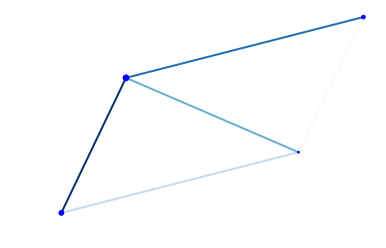

In [22]:
#detour from companion to sketch adjacency matrix example from p112 of VMLS
import networkx as nx
pg112 = np.matrix([[0,1,1,0],[1,0,0,1],[0,0,0,1],[1,0,0,0]])
G = nx.from_numpy_matrix(pg112)
pos = nx.layout.spring_layout(G)
node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', with_labels=True)
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)

ax = plt.gca()
ax.set_axis_off()
plt.show()

# 6.2 Zero and Identity Matrices

In [23]:
np.zeros((2,2)) #J: zeros(2,2)

array([[0., 0.],
       [0., 0.]])

In [24]:
A = np.identity(4)
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [25]:
A = np.array([[1,-1,2],[0,3,-1]])
np.hstack([A, np.identity(np.shape(A)[0])]) #J: [A I]

array([[ 1., -1.,  2.,  1.,  0.],
       [ 0.,  3., -1.,  0.,  1.]])

In [26]:
A = np.array([[1,-1,2],[0,3,-1]])
np.vstack([A,np.identity(np.shape(A)[1])]) #J: [A; I]

array([[ 1., -1.,  2.],
       [ 0.,  3., -1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [27]:
B = np.array([[1,2],[3,4]])
B+np.identity(np.shape(B)[0]) #J: B+I

array([[2., 2.],
       [3., 5.]])

In [28]:
np.diag([1,2,3]) #J: diagm(0=>x)

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [29]:
H = np.matrix([[0,1,-2,1],[2,-1,3,0]])
H
np.vstack(np.diag(H)) #J: diag(H)

array([[ 0],
       [-1]])

In [30]:
np.random.rand(2,3), np.random.randn(3,2) #J: rand(2,3), randn(3,2)

(array([[0.11052284, 0.31152561, 0.49893203],
        [0.54509711, 0.60581509, 0.63897561]]),
 array([[-0.81888454,  0.51676311],
        [-0.86370133, -0.58392722],
        [-0.20606463, -0.32880687]]))

In [31]:
I = np.array([1,2,2,1,3,4]) #rows
J = np.array([1,1,2,3,3,4]) #cols
V = np.array([-1.11,.15,-.1, 1.17, -.3,.13]) #data

In [32]:
from scipy.sparse import csc_matrix, rand, find
csc_matrix([I,J,V]).toarray().transpose() #J: A = sparse(I,J,V,4,5)

array([[ 1.  ,  1.  , -1.11],
       [ 2.  ,  1.  ,  0.15],
       [ 2.  ,  2.  , -0.1 ],
       [ 1.  ,  3.  ,  1.17],
       [ 3.  ,  3.  , -0.3 ],
       [ 4.  ,  4.  ,  0.13]])

In [33]:
A = csc_matrix([[1,3,2,1],[1,1,2,3],[1.0,2.0,3.0,4.0]]).transpose()
A.toarray(), np.count_nonzero(A.toarray())

(array([[1., 1., 1.],
        [3., 1., 2.],
        [2., 2., 3.],
        [1., 3., 4.]]), 12)

In [34]:
#Not sure what's going on on page 53 final example of returning a 3x3 non-sparse matrix 
#looks like it takes the 4x1 RHS of the sparse matrix and shapes it into a 3x3

In [35]:
A = rand(10000,10000,density=10**-7, format='csc')
A.nnz

10

In [36]:
find(A)

(array([9766, 6691, 6447,   88, 5114, 2034,  531,  788, 5785, 8042],
       dtype=int32),
 array([1416, 1515, 2162, 2334, 2632, 2851, 3595, 4026, 4062, 6622],
       dtype=int32),
 array([0.02535819, 0.29854673, 0.80507639, 0.02392318, 0.36556313,
        0.44434366, 0.07384048, 0.73644608, 0.95812842, 0.70699772]))

# 6.3 Transpose, Addition, Norm

In [37]:
H = np.array([[0,1,-2,1],[2,-1,3,0]])
H

array([[ 0,  1, -2,  1],
       [ 2, -1,  3,  0]])

In [38]:
H.transpose() #J : H'

array([[ 0,  2],
       [ 1, -1],
       [-2,  3],
       [ 1,  0]])

In [39]:
U,V = np.array([[0,4],[7,0],[3,1]]),np.array([[1,2],[2,3],[0,4]])
U, V

(array([[0, 4],
        [7, 0],
        [3, 1]]), array([[1, 2],
        [2, 3],
        [0, 4]]))

In [40]:
U+V, 2.2*U 

(array([[1, 6],
        [9, 3],
        [3, 5]]), array([[ 0. ,  8.8],
        [15.4,  0. ],
        [ 6.6,  2.2]]))

In [41]:
#matrix norms
A = np.array([[2,3,-1],[0,-1,4]])
npl.norm(A), npl.norm(A[:])

(5.5677643628300215, 5.5677643628300215)

In [42]:
#triangle inequality
A,B = np.array([[-1,0],[2,2]]),np.array([[3,1],[-3,2]])
npl.norm(A+B), npl.norm(A)+npl.norm(B)

(4.69041575982343, 7.795831523312719)

# 6.4 Matrix-Vector Multiplication

In [43]:
A,x = np.array([[0,2,-1],[-2,1,1]]), np.array([2,1,-1])
np.matmul(A,x) #J: A*x, which in python returns a 2x3 with A values multiplied by x values

array([ 3, -4])

In [44]:
#c_ is an np method for adding a column. 
#J equiv: [-eye zeros] automatically adds column wise
difference_matrix = lambda n: np.c_[-np.identity(n-1), np.zeros(n-1)] + np.c_[np.zeros(n-1), np.eye(n-1)] 
D = difference_matrix(4)
D

array([[-1.,  1.,  0.,  0.],
       [ 0., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])

In [45]:
np.matmul(D,np.array([-1,0,2,1]))

array([ 1.,  2., -1.])

In [46]:
#don't know what the sparse identity matrix is doing on 57

In [47]:
#running sum
def running_sum(n):
    S = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1): #0 indexing fix to get diags = 1
            S[i,j] = 1
            
    return S

In [48]:
running_sum(4),np.matmul(running_sum(4),np.array([-1,1,2,0]))

(array([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]]), array([-1.,  0.,  2.,  2.]))

In [49]:
#tril implementation #J: tril(ones(n,n))
#also running sum test
sum_test_list = np.tril(np.ones((4,4)))
np.tril(np.ones((4,4))), [np.sum(i) for i in sum_test_list]

(array([[1., 0., 0., 0.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 1.]]), [1.0, 2.0, 3.0, 4.0])

In [50]:
np.vander([-1,-0,0.5,1],5) #col-wise reverse to vander in Julia?

array([[ 1.    , -1.    ,  1.    , -1.    ,  1.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
       [ 0.0625,  0.125 ,  0.25  ,  0.5   ,  1.    ],
       [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ]])

In [51]:
#credits wolfram:
#Vandermonde matrices are:
#"a type of matrix that arises in the polynomial least squares fitting, 
#Lagrange interpolating polynomials (Hoffman and Kunze p. 114), 
#and the reconstruction of a statistical distribution from the 
#distribution's moments [mean, variance, skewness, kurtosis (sharpness)]"
def vander(t,n):
    m = len(t)
    V = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            V[i,j] = t[i]**(j)
    return V

#ie: 
# vander = lambda t,n : np.matrix([[i**(j) for i in t] for j in range(n)]).transpose()
#or
# vander = lambda t,n : np.vstack([np.array(t)**i for i in range(n)]).transpose()
vander([-1,-0,0.5,1],5)

array([[ 1.    , -1.    ,  1.    , -1.    ,  1.    ],
       [ 1.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 1.    ,  0.5   ,  0.25  ,  0.125 ,  0.0625],
       [ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ]])

# 6.5 Complexity

In [52]:
A,x = np.random.rand(1000,10000), np.random.rand(10000)
%timeit y=np.matmul(A,x)

4.92 ms ± 823 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%timeit y=np.matmul(A,x)

3.58 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
A,x = np.random.rand(5000,20000), np.random.rand(20000)
%timeit y=np.matmul(A,x)

34.9 ms ± 2.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%timeit y=np.matmul(A,x)

34.4 ms ± 4.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Complexity of multiplying m x n matrix with an n vector is linear with both m and n, we see a factor of 10 time increase given a factor of of 5 and 2 for m and n increasing